In [74]:
import numpy as np
import pandas as pd
import os, sys, time
import matplotlib.pyplot as plt
import imageio
#sys.path.append('/home/yueqi/lib/rivuletpy')
#from rivuletpy import *
sys.path.append('../')
from src.preprocessing import *
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
np.set_printoptions(precision=2, suppress=True, edgeitems=5)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
neurons_all = pd.read_pickle('../data/rodent_3d_dendrites_br-ct-filter-3_all_mainclasses.pkl')

In [76]:
neurons_all.label1.value_counts(dropna=False)

cortex pyramidal superficial    3691
cortex pyramidal deep           3466
cortex pyramidal no layer       2523
hippocampus granule             1881
striatum medium spiny           1484
retina ganglion                 1297
hippocampus pyramidal           1169
cortex basket                    515
retina bipolar                   446
retina amacrine                  369
amygdala pyramidal               353
olfactory bulb granule           282
cortex Martinotti                282
Name: label1, dtype: int64

In [77]:
drop = ['retina bipolar', 'retina amacrine']
neurons_use = neurons_all[~neurons_all.label1.isin(drop)]

In [78]:
neurons_use.label1.value_counts(dropna=False)

cortex pyramidal superficial    3691
cortex pyramidal deep           3466
cortex pyramidal no layer       2523
hippocampus granule             1881
striatum medium spiny           1484
retina ganglion                 1297
hippocampus pyramidal           1169
cortex basket                    515
amygdala pyramidal               353
olfactory bulb granule           282
cortex Martinotti                282
Name: label1, dtype: int64

In [230]:
class_label_dict = {'cortex pyramidal superficial': 0,
               'cortex pyramidal deep': 1,
               'hippocampus granule': 2,
               'striatum medium spiny': 3,
               'retina ganglion': 4,
               'hippocampus pyramidal': 5,
               'cortex basket': 6,
               'amygdala pyramidal': 7,
               'olfactory bulb granule': 8,
               'cortex Martinotti': 9,
               'cortex pyramidal no layer': 10}

In [231]:
class_labels = pd.DataFrame({'label': pd.Series(class_label_dict), 'count': neurons_use.label1.value_counts()}).sort_values('label')
class_labels

,count,label
cortex pyramidal superficial,3691,0
cortex pyramidal deep,3466,1
hippocampus granule,1881,2
striatum medium spiny,1484,3
retina ganglion,1297,4
hippocampus pyramidal,1169,5
cortex basket,515,6
amygdala pyramidal,353,7
olfactory bulb granule,282,8
cortex Martinotti,282,9


In [247]:
class_labels[:7]

,count,label
cortex pyramidal superficial,3691,0
cortex pyramidal deep,3466,1
hippocampus granule,1881,2
striatum medium spiny,1484,3
retina ganglion,1297,4
hippocampus pyramidal,1169,5
cortex basket,515,6


In [253]:
class_labels['count'].sum()

16943

In [232]:
class_labels.to_csv('../data/class_labels.csv')

In [233]:
neurons_use['label1_id'] = neurons_use['label1'].map(class_label_dict)
neurons_use['label1_id'].value_counts()

/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0     3691
1     3466
10    2523
2     1881
3     1484
4     1297
5     1169
6      515
7      353
9      282
8      282
Name: label1_id, dtype: int64

In [99]:
neurons_use[neurons_use.cell_type_2_curated=='ganglion'].domain.value_counts()

Dendrites, Soma, Axon          821
Dendrites, Soma, No Axon       446
Dendrites, No Soma, No Axon     29
Dendrites, No Soma, Axon         1
Name: domain, dtype: int64

In [7]:
n_cells = len(neurons_use)
soma_num = dict()
first_row = np.zeros((n_cells, 7))
max_coord = np.zeros((n_cells, 3))
min_coord = np.zeros((n_cells, 3))
max_abs_coord = np.zeros((n_cells, 3))
mean_coord = np.zeros((n_cells, 3))
median_coord = np.zeros((n_cells, 3))
for i, nid in enumerate(neurons_use.neuron_id):
    if i % 100 == 0:
        print(i)
    swc_path = '../data/swc_std/%d.swc' % nid
    swc_ori = loadswc(swc_path)
    swc = swc_ori[np.isin(swc_ori[:,1], [1,3,4, 6]), :]
    n_soma = np.sum(swc[:,1] == 1)
    radius = False
    if n_soma == 3 and swc[3, 6] == 1:
        radius = True
    soma_num[nid] = (n_soma, radius)
    first_row[i,:] = swc[0]
    max_coord[i,:] = np.max(swc[:,2:5], axis=0)
    min_coord[i,:] = np.min(swc[:,2:5], axis=0)
    max_abs_coord[i,:] = np.max(np.abs(swc[:,2:5]), axis=0)
    mean_coord[i,:] = np.mean(swc[:,2:5], axis=0)
    median_coord[i,:] = np.median(swc[:,2:5], axis=0)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900


In [100]:
max_coord[:,0]

array([ 165.77,  236.38,  145.64,  206.84,  150.69, ...,   61.62,  107.51,
         85.98,  167.83,  140.48])

In [106]:
neurons_use['n_soma_node'] = neurons_use.neuron_id.map(lambda x: soma_num[x][0])
neurons_use['soma_has_radius'] = neurons_use.neuron_id.map(lambda x: soma_num[x][1])
neurons_use['den_max_x'] = max_coord[:,0]
neurons_use['den_max_y'] = max_coord[:,1]
neurons_use['den_max_z'] = max_coord[:,2]
neurons_use['den_min_x'] = max_coord[:,0]
neurons_use['den_min_y'] = max_coord[:,1]
neurons_use['den_min_z'] = max_coord[:,2]

/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [234]:
neurons_use

,3D,5HT3,CCK,CR,NPY,PV,SOM,SOM_PV,VIP,age_classification,angles,archive,attributes,bif_ampl_local,br1,br2,br3,br4,brain_region,branch_Order,cell_type,cell_type_1,cell_type_2,cell_type_2_curated,contraction,deposition_date,depth,diameter,domain,ds_layer,eucDistance,exact_layer,experiment_condition,fastspike,fractal_Dim,fragmentation,height,hemisphere,label1,length,magnification,max_age,max_weight,min_age,min_weight,n_bifs,n_branch,n_stems,neuron_id,neuron_name,note,objective_type,original_format,partition_asymmetry,pathDistance,physical_Integrity,pk_classic,protocol,raw_layer,reconstruction_software,reference_pmid,rough_layer,scientific_name,shrinkage_corrected,shrinkage_reported,slicing_direction,slicing_thickness,soma_Surface,soma_surface,species,stain,strain,surface,upload_date,volume,width,label1_id,n_soma_node,soma_has_radius,den_max_x,den_max_y,den_max_z,den_min_x,den_min_y,den_min_z
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",74.6228,hippocampus,CA1,None,None,"[hippocampus, CA1]",18.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.618158,2005-12-31,395.19,0.531806,"Dendrites, Soma, No Axon",None,669.544,NaN,Control,NaN,1.07516,3535.0,781.128,None,hippocampus pyramidal,21804.30,100,8.0,350.0,2.0,200.0,81.0,168.0,6.0,81,n400,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.541107,1896.240,Dendrites Complete,1.67043,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,672.1650,672.165,rat,biocytin,Fischer 344,36679.00,2006-08-01,6596.1800,298.946,5,22,False,165.770,611.41,130.63,165.770,611.41,130.63
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",89.5897,hippocampus,CA1,None,None,"[hippocampus, CA1]",25.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.696795,2005-12-31,364.21,1.155640,"Dendrites, Soma, No Axon",None,668.556,NaN,Control,NaN,1.06807,5460.0,717.176,None,hippocampus pyramidal,22216.30,100,8.0,350.0,2.0,200.0,113.0,233.0,7.0,82,n401,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.555624,1893.370,Dendrites Complete,1.78362,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,903.2510,903.251,rat,biocytin,Fischer 344,84796.10,2006-08-01,30674.3000,363.699,5,15,False,236.380,609.71,322.83,236.380,609.71,322.83
2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",75.6994,hippocampus,CA1,None,None,"[hippocampus, CA1]",26.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.729870,2005-12-31,313.74,0.278764,"Dendrites, Soma, No Axon",None,732.304,NaN,Control,NaN,1.06048,4632.0,831.900,None,hippocampus pyramidal,16317.10,100,8.0,350.0,2.0,200.0,89.0,182.0,4.0,83,n402,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.495147,1316.660,Dendrites Complete,1.42035,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,845.1840,845.184,rat,biocytin,Fischer 344,14822.40,2006-08-01,2966.5600,241.446,5,10,False,145.640,704.45,197.18,145.640,704.45,197.18
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",90.4303,hippocampus,CA1,None,None,"[hippocampus, CA1]",30.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.762996,2005-12-31,255.10,0.257058,"Dendrites, Soma, No Axon",None,663.666,NaN,Control,NaN,1.05999,4766.0,723.540,None,hippocampus pyramidal,17697.80,100,8.0,350.0,2.0,200.0,100.0,206.0,6.0,84,n403,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.537944,1007.520,Dendrites Complete,1.88745,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,528.4140,528.414,rat,biocytin,Fischer 344,15463.60,2006-08-01,2049.0700,235.720,5,11,False,206.840,663.41,259.88,206.840,663.41,259.88
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",87.4279,hippocampus,CA1,None,None,"[hippocampus, CA1]",31.0,"[pyramidal, principal 

In [235]:
neurons_use.to_pickle('../data/rodent_3d_dendrites_br-ct-filter-3_all_mainclasses_use.pkl', protocol=2)

# Filter out cells with extreme size, then save

### many neurons have 2-3 soma nodes to show radius but not attached to dendrites -- don't draw these nodes
### many other neurons have many soma nodes (attached to dendrites) -- draw these nodes

In [26]:
soma_num 

{81: (22, False),
 82: (15, False),
 83: (10, False),
 84: (11, False),
 85: (14, False),
 86: (12, False),
 87: (8, False),
 88: (12, False),
 89: (14, False),
 90: (7, False),
 91: (29, False),
 92: (27, False),
 93: (13, False),
 94: (13, False),
 95: (16, False),
 96: (10, False),
 97: (13, False),
 98: (11, False),
 99: (12, False),
 100: (14, False),
 101: (9, False),
 102: (11, False),
 103: (10, False),
 104: (15, False),
 105: (36, False),
 106: (40, False),
 107: (39, False),
 108: (32, False),
 109: (51, False),
 110: (32, False),
 111: (30, False),
 112: (44, False),
 113: (17, False),
 114: (33, False),
 115: (27, False),
 116: (42, False),
 117: (31, False),
 118: (37, False),
 119: (34, False),
 120: (12, False),
 121: (29, False),
 122: (33, False),
 123: (21, False),
 124: (13, False),
 125: (64, False),
 126: (74, False),
 127: (64, False),
 128: (35, False),
 129: (53, False),
 130: (98, False),
 131: (58, False),
 132: (23, False),
 133: (30, False),
 134: (28, Fals

## many neurons do not have soma centered at 0

In [27]:
neurons_use.neuron_id[first_row[:,2]>0]

47         128
145        241
147        252
148        253
152        257
156        270
157        271
158        276
159        277
163        314
165        321
166        325
167        326
168        328
169        329
170        333
171        339
174        348
175        349
176        350
177        354
179        356
181        359
182        361
183        362
184        363
186        369
187        371
188        375
194        386
195        389
196        393
197        394
199        399
200        401
201        402
202        403
204        405
206        409
207        410
208        416
210        418
212        428
213        432
216        437
217        441
218        442
219        443
275        580
281        586
282        587
283        588
284        589
285        590
286        591
287        592
288        593
289        594
290        595
291        596
292        597
293        598
294        599
295        600
296        601
297        602
298       

In [42]:
first_row[first_row[:,2]>0]

array([[  1.  ,   1.  ,   2.16,  -0.64,  -8.8 ,   4.26,  -1.  ],
       [  1.  ,   1.  ,  27.48,  22.09,   2.37,   6.47,  -1.  ],
       [  1.  ,   1.  ,   9.86, -21.53,  14.92,  13.79,  -1.  ],
       [  1.  ,   1.  ,  62.36, -18.11,   3.21,  12.08,  -1.  ],
       [  1.  ,   1.  ,  15.24, -48.6 ,   0.  ,  15.76,  -1.  ],
       ..., 
       [  1.  ,   1.  ,   3.09,   0.87,  -0.46,   9.83,  -1.  ],
       [  1.  ,   1.  ,   6.27,   2.68,   2.46,   9.56,  -1.  ],
       [  1.  ,   1.  ,   0.28,   0.07,   5.25,   5.25,  -1.  ],
       [  1.  ,   3.  ,   2.57,   3.03,   0.39,   9.46,  -1.  ],
       [  1.  ,   3.  ,  10.79,   0.21,  12.51,   5.28,  -1.  ]])

In [28]:
max_coord[:5]

array([[ 165.77,  611.41,  130.63],
       [ 236.38,  609.71,  322.83],
       [ 145.64,  704.45,  197.18],
       [ 206.84,  663.41,  259.88],
       [ 150.69,  652.73,  176.24]])

# dendritic span has long tail distribution (extreme - median)

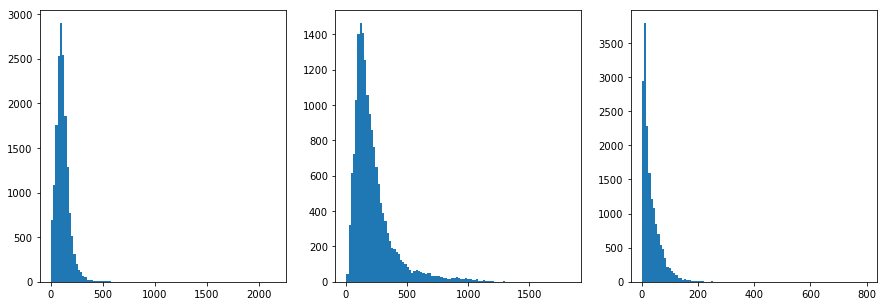

In [30]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
x = max_coord - median_coord
axes[0].hist(x[:,0], bins=100)
axes[1].hist(x[:,1], bins=100)
axes[2].hist(x[:,2], bins=100)
plt.show()

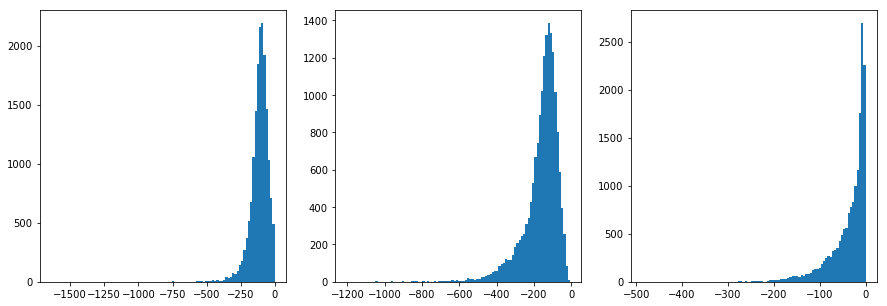

In [31]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
x = min_coord - median_coord
axes[0].hist(x[:,0], bins=100)
axes[1].hist(x[:,1], bins=100)
axes[2].hist(x[:,2], bins=100)
plt.show()

## extreme - first_row (soma)

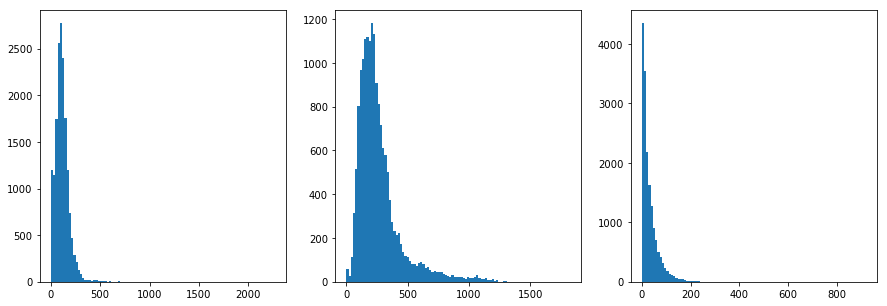

In [32]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
x = max_coord - first_row[:,2:5]
axes[0].hist(x[:,0], bins=100)
axes[1].hist(x[:,1], bins=100)
axes[2].hist(x[:,2], bins=100)
plt.show()

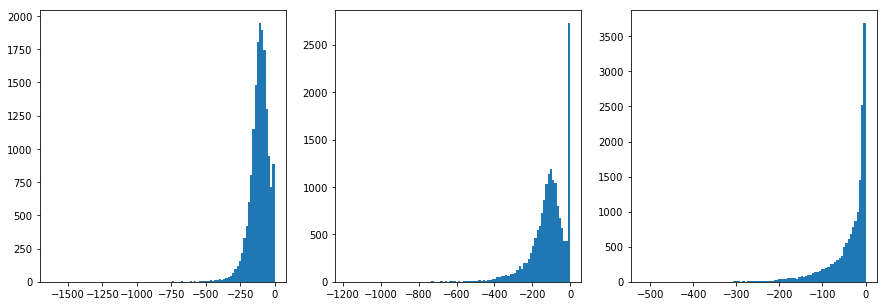

In [33]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
x = min_coord - first_row[:,2:5]
axes[0].hist(x[:,0], bins=100)
axes[1].hist(x[:,1], bins=100)
axes[2].hist(x[:,2], bins=100)
plt.show()

# use Max - Min range to filter out cells that are too large

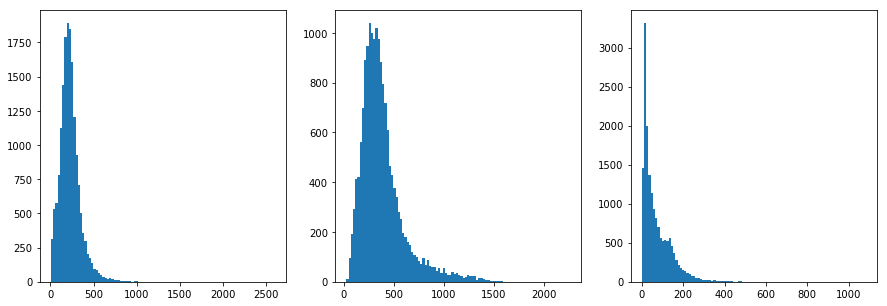

In [34]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
x = max_coord - min_coord
axes[0].hist(x[:,0], bins=100)
axes[1].hist(x[:,1], bins=100)
axes[2].hist(x[:,2], bins=100)
plt.show()

## x, y < 1500 um, z < 400

In [35]:
size = max_coord - min_coord
neurons_use.neuron_id[size[:,0]>1500]
# mostly pyramidal neurons

151        256
594       2563
12212    54295
Name: neuron_id, dtype: int64

In [36]:
size = max_coord - min_coord
neurons_use.neuron_id[size[:,1]>1500]
# mostly pyramidal neurons

151        256
594       2563
1097      5520
1949      7826
1954      7831
2505      9179
6683     36595
6871     36926
6994     37395
7107     37829
12698    59708
281      37214
283      37224
Name: neuron_id, dtype: int64

In [53]:
size = max_coord - min_coord
neurons_use.neuron_id[size[:,2]>384]
# mostly pyramidal neurons

0           81
1           82
3           84
6           87
7           88
8           89
11          92
16          97
21         102
22         103
34         115
42         123
88         182
89         183
97         191
100        194
101        195
102        196
140        235
147        252
281        586
282        587
284        589
285        590
286        591
287        592
288        593
289        594
292        597
293        598
294        599
295        600
296        601
297        602
298        603
300        680
301        681
303        683
305        685
306        686
326        927
327        928
328        929
329        931
330        933
331        934
393       1117
420       1144
492       2271
650       2676
1745      6780
5652     34962
5653     34963
5657     34967
7002     37413
7626     47241
9889     49846
13487    60922
14568    65558
14647    65637
15520    67719
15521    67720
15524    67723
15527    67726
15534    67733
15545    67744
15553    6

In [54]:
len(neurons_use.neuron_id[size[:,2]>384])

67

In [38]:
size = max_coord - min_coord
neurons_use.neuron_id[size[:,0]<50]

861       4488
874       4501
875       4502
1331      6160
1361      6315
1363      6317
1369      6323
1370      6324
1392      6346
1411      6365
1415      6369
1507      6461
1634      6588
2957     10883
2985     10911
3728     30886
3779     30937
4576     31755
4577     31756
5167     33326
5180     33341
5198     33359
5427     34028
5428     34029
5429     34030
5430     34031
5431     34033
5432     34035
5433     34036
5434     34037
5435     34039
5436     34040
5438     34042
5439     34043
5440     34044
5441     34045
5442     34046
5444     34048
5445     34049
5446     34050
5447     34051
5448     34052
5450     34054
5451     34055
5452     34056
5454     34058
5455     34059
5456     34060
5457     34061
5458     34062
5459     34063
5460     34064
5461     34065
5462     34066
5463     34067
5464     34068
5465     34069
5466     34070
5467     34071
5468     34072
5470     34074
5471     34075
5472     34076
5473     34077
5474     34078
5475     34079
5476     3

# Filter out large neurons that do not fit into the image

In [236]:
size = max_coord - min_coord
neurons_use_filter = neurons_use[(size[:,0]<1500) & (size[:,1]<1500) & (size[:,2]<384)]

In [237]:
neurons_use_filter.shape

(16862, 85)

In [238]:
neurons_use_filter

,3D,5HT3,CCK,CR,NPY,PV,SOM,SOM_PV,VIP,age_classification,angles,archive,attributes,bif_ampl_local,br1,br2,br3,br4,brain_region,branch_Order,cell_type,cell_type_1,cell_type_2,cell_type_2_curated,contraction,deposition_date,depth,diameter,domain,ds_layer,eucDistance,exact_layer,experiment_condition,fastspike,fractal_Dim,fragmentation,height,hemisphere,label1,length,magnification,max_age,max_weight,min_age,min_weight,n_bifs,n_branch,n_stems,neuron_id,neuron_name,note,objective_type,original_format,partition_asymmetry,pathDistance,physical_Integrity,pk_classic,protocol,raw_layer,reconstruction_software,reference_pmid,rough_layer,scientific_name,shrinkage_corrected,shrinkage_reported,slicing_direction,slicing_thickness,soma_Surface,soma_surface,species,stain,strain,surface,upload_date,volume,width,label1_id,n_soma_node,soma_has_radius,den_max_x,den_max_y,den_max_z,den_min_x,den_min_y,den_min_z
2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",75.6994,hippocampus,CA1,None,None,"[hippocampus, CA1]",26.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.729870,2005-12-31,313.74,0.278764,"Dendrites, Soma, No Axon",None,732.304,NaN,Control,NaN,1.06048,4632.0,831.900,None,hippocampus pyramidal,16317.10,100,8.0,350.0,2.0,200.0,89.0,182.0,4.0,83,n402,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.495147,1316.660,Dendrites Complete,1.42035,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,845.1840,845.184,rat,biocytin,Fischer 344,14822.40,2006-08-01,2966.5600,241.446,5,10,False,145.640,704.45,197.18,145.640,704.45,197.18
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",87.4279,hippocampus,CA1,None,None,"[hippocampus, CA1]",31.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.738674,2005-12-31,227.67,0.327931,"Dendrites, Soma, No Axon",None,668.452,NaN,Control,NaN,1.05664,5032.0,712.534,None,hippocampus pyramidal,17344.40,100,8.0,350.0,2.0,200.0,105.0,213.0,3.0,85,n404,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.542943,1344.560,Dendrites Complete,1.93384,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,638.7010,638.701,rat,biocytin,Fischer 344,19024.10,2006-08-01,3402.1900,270.366,5,14,False,150.690,652.73,176.24,150.690,652.73,176.24
5,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",80.7548,hippocampus,CA1,None,None,"[hippocampus, CA1]",31.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.719511,2005-12-31,193.59,0.486155,"Dendrites, Soma, No Axon",None,728.603,NaN,Control,NaN,1.06799,4350.0,749.115,None,hippocampus pyramidal,14724.80,100,8.0,350.0,2.0,200.0,82.0,169.0,5.0,86,n405,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.601319,1143.970,Dendrites Complete,1.53977,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,985.1020,985.102,rat,biocytin,Fischer 344,23513.50,2006-08-01,5563.7500,278.318,5,12,False,170.410,711.16,161.60,170.410,711.16,161.60
9,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",76.7842,hippocampus,CA1,None,None,"[hippocampus, CA1]",17.0,"[pyramidal, principal cell]",principal cell,[pyramidal],pyramidal,0.720765,2005-12-31,317.91,0.617374,"Dendrites, Soma, No Axon",None,694.450,NaN,Control,NaN,1.04708,3448.0,839.183,None,hippocampus pyramidal,16141.90,100,8.0,350.0,2.0,200.0,81.0,164.0,2.0,90,n409,"When originally released, this reconstruction ...",oil,CVAPP.swc,0.515187,1203.340,Dendrites Complete,1.72739,in vivo,None,Neurolucida,[9492204],NaN,rattus norvegicus,Y,Reported,coronal,80.00,1032.4300,1032.43,rat,biocytin,Fischer 344,32775.00,2006-08-01,7822.2200,329.852,5,7,False,204.330,663.46,171.32,204.330,663.46,171.32
10,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,young,True,Turner,"Diameter, 3D, Angles",81.8827,hippocampus,CA1,None,None,"[hippocampus, CA1]",10.0,"[pyramidal, principal c

# save data

In [239]:
neurons_use_filter.to_pickle('../data/rodent_3d_dendrites_br-ct-filter-3_all_mainclasses_use_filter.pkl', protocol=2)

## How about resizing all neurons to fit the canvas? Does size matter? 
Try this later after baseline model

# test drawing functions in 2D and 3D

In [45]:
neuron_id = 33246 # 63444 amacrine # 34049 granule #64094 bipolar # 4484 pyramidal # 899 pyramidal

In [46]:
swc = loadswc('../data/swc_std/%d.swc' % neuron_id)
imgshape = (768, 768, 200)
swc = normalize_swc(swc, canvas_shape=imgshape, shrink=2)

In [47]:
swc[:50]

array([[   1.  ,    1.  ,  381.63,  280.05,   98.55,    9.96,   -1.  ],
       [   2.  ,    1.  ,  381.4 ,  281.28,   98.58,    9.59,    1.  ],
       [   3.  ,    1.  ,  381.2 ,  282.51,   98.59,    9.52,    2.  ],
       [   4.  ,    1.  ,  380.72,  283.67,   98.6 ,    8.12,    3.  ],
       [   5.  ,    1.  ,  380.09,  284.75,   98.62,    6.97,    4.  ],
       [   6.  ,    1.  ,  379.64,  285.91,   98.65,    6.6 ,    5.  ],
       [   7.  ,    1.  ,  379.12,  287.04,   98.68,    5.46,    6.  ],
       [   8.  ,    1.  ,  378.66,  288.2 ,   98.72,    4.75,    7.  ],
       [   9.  ,    1.  ,  378.49,  289.44,   98.77,    4.17,    8.  ],
       [  10.  ,    1.  ,  378.37,  290.67,   98.88,    3.72,    9.  ],
       [  11.  ,    4.  ,  378.27,  291.91,   98.92,    3.19,   10.  ],
       [  12.  ,    4.  ,  377.75,  293.04,   98.88,    2.9 ,   11.  ],
       [  13.  ,    4.  ,  377.13,  294.12,   98.94,    3.1 ,   12.  ],
       [  14.  ,    4.  ,  376.47,  295.17,   99.01,    3.12,   

In [60]:
skimg_2d_render = draw_sk_img(imgshape, swc, dims=2)
skimg_2d_render.shape

(768, 768)

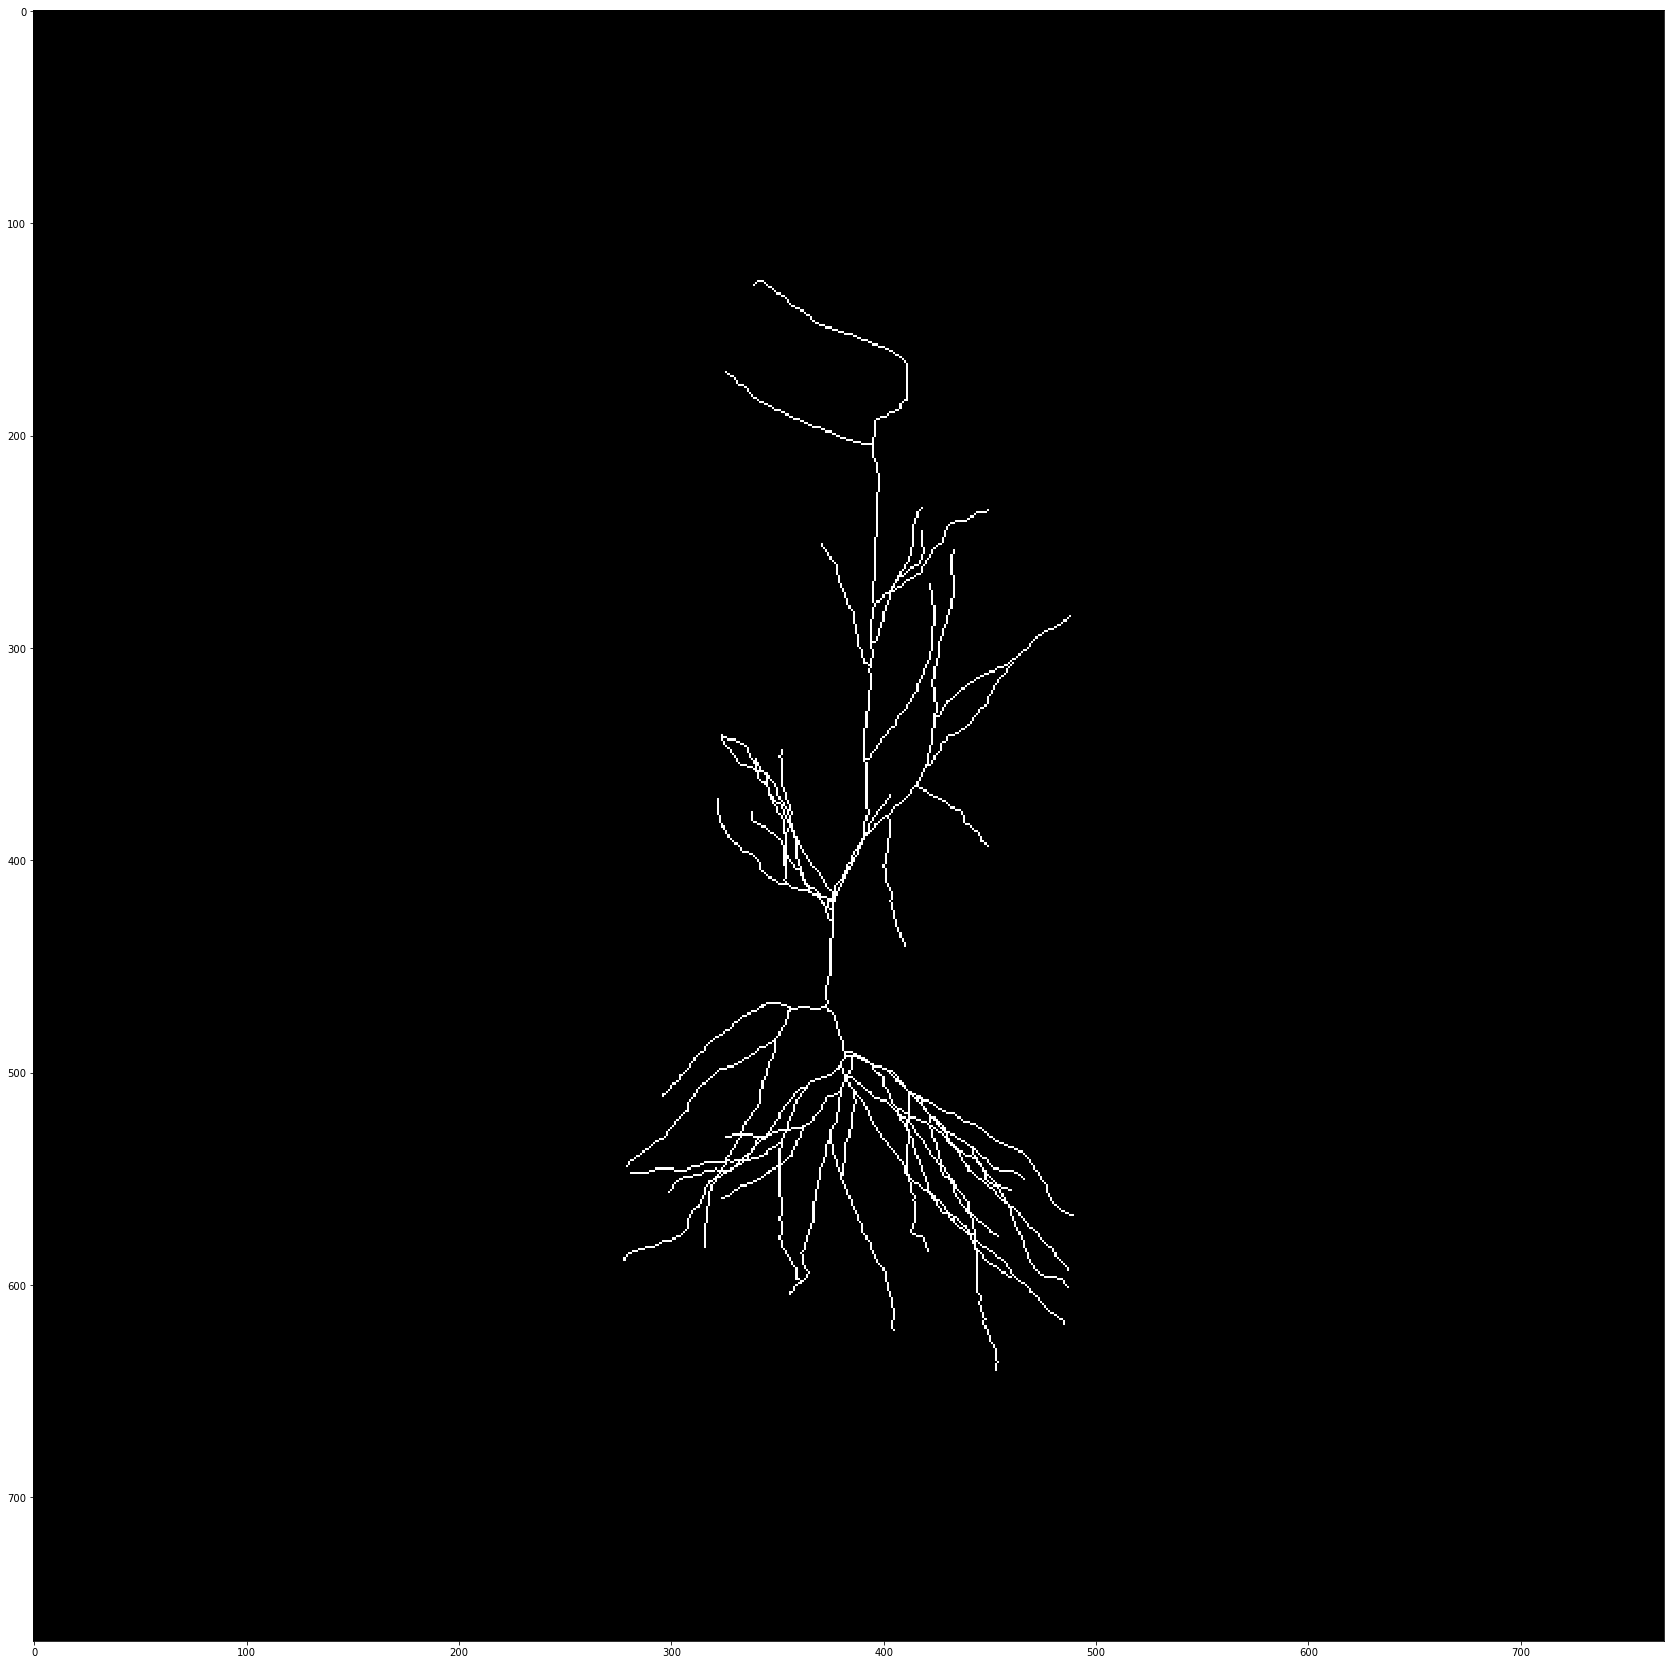

In [61]:
plt.figure(figsize=(30,30))
plt.imshow(skimg_2d_render/skimg_2d_render.max(), cmap='gray')
plt.show()

In [58]:
skimg_3d_render = draw_sk_img(imgshape, swc, dims=3)
mip_sk_3d = np.max(skimg_3d_render, axis=2)
mip_sk_3d.shape

(768, 768)

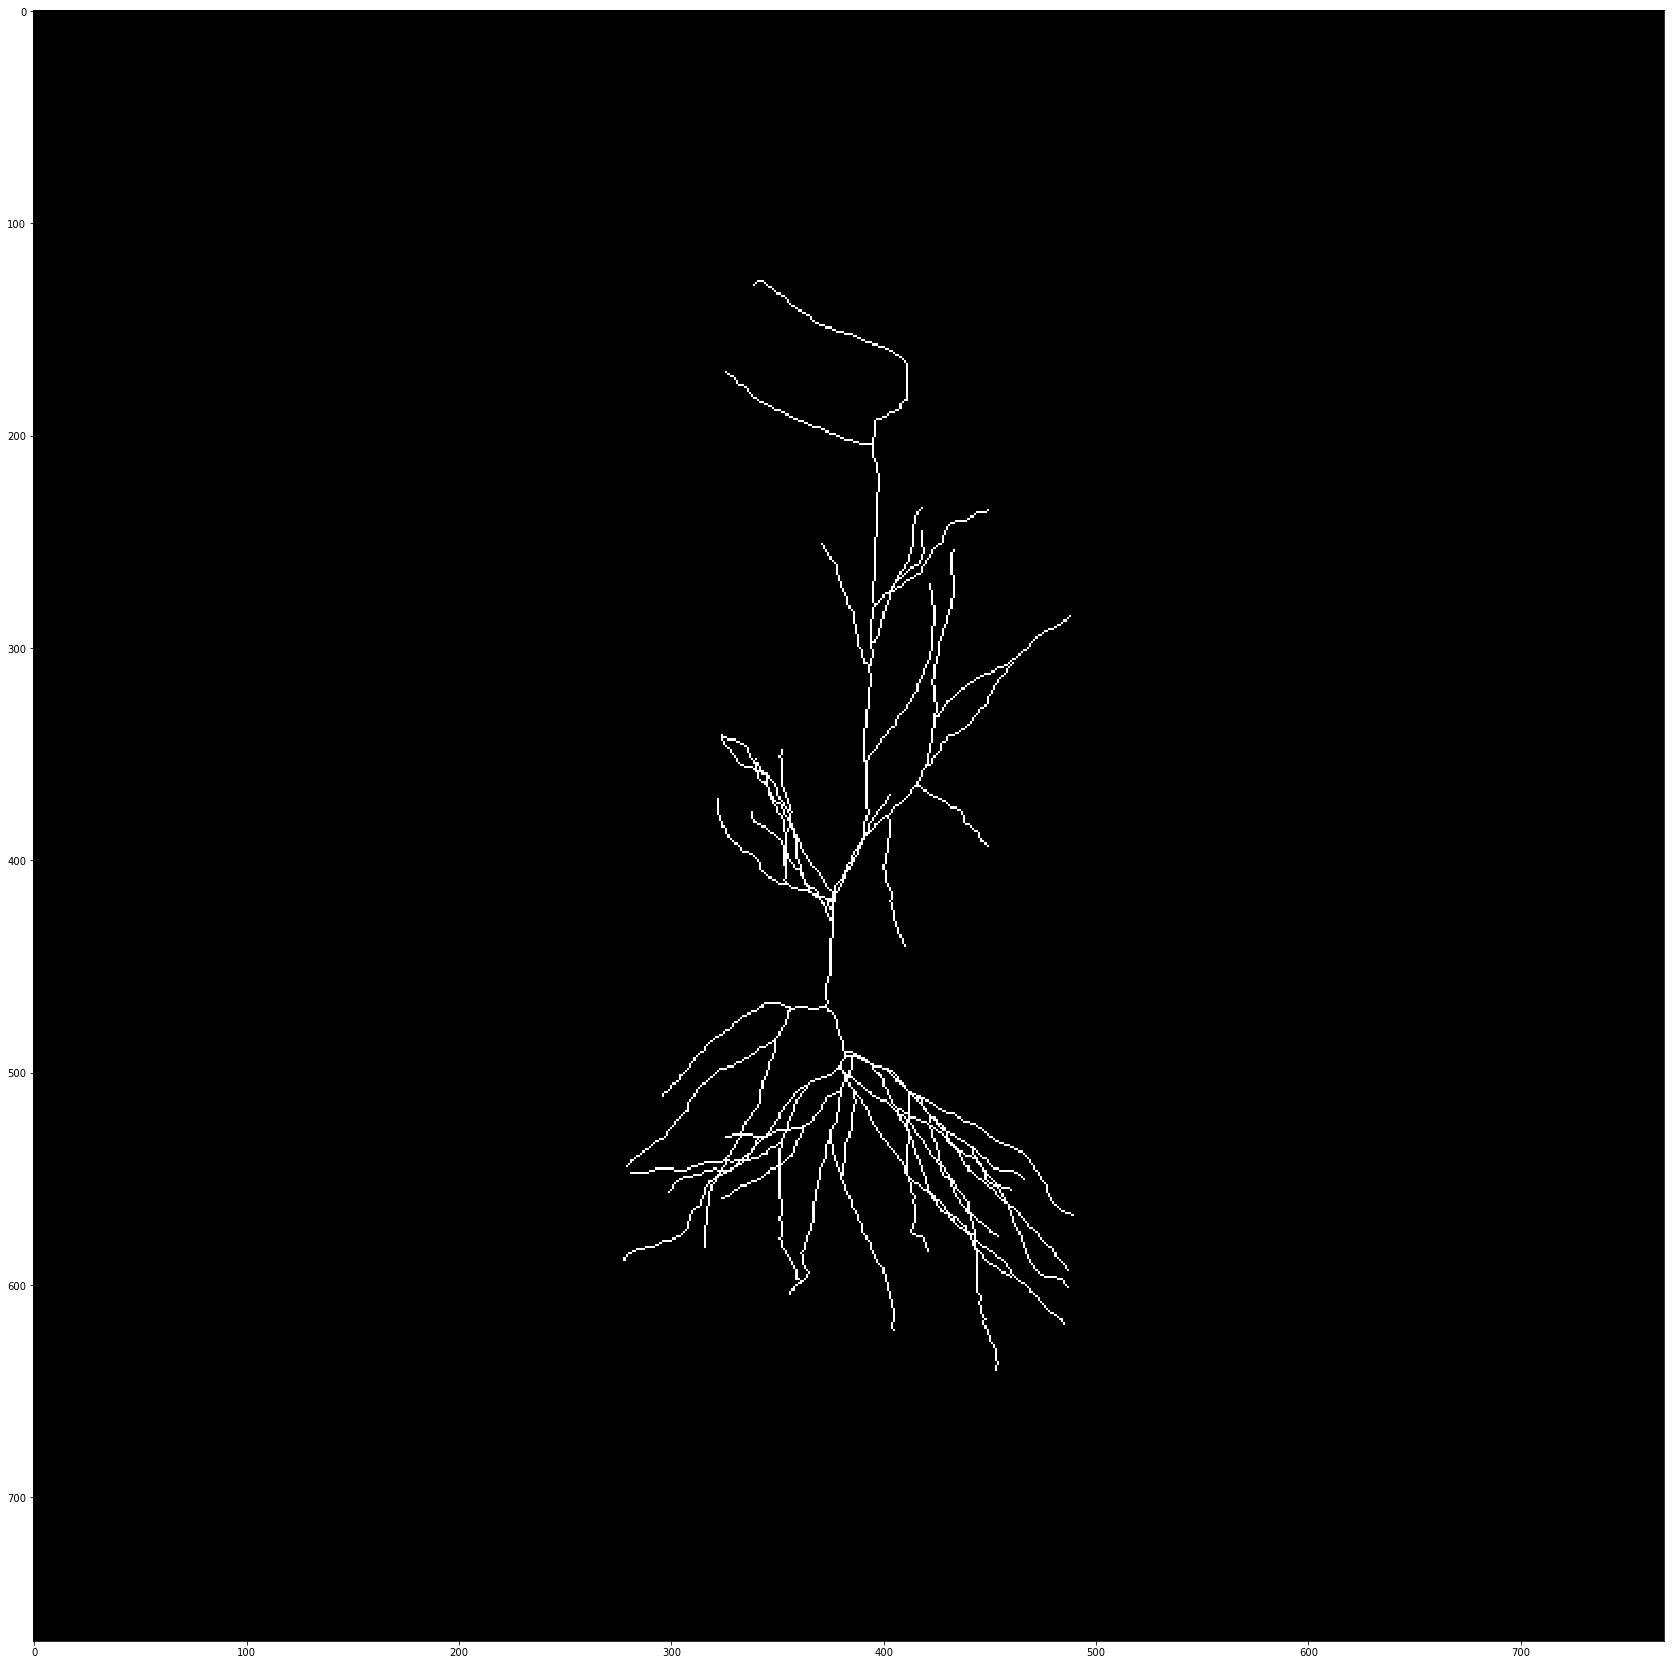

In [65]:
plt.figure(figsize=(30,30))
plt.imshow(mip_sk_3d/mip_sk_3d.max(), cmap='gray')
plt.show()

In [52]:
mip_sk = np.max(skimg_3d_render, axis=0)
mip_sk.shape

(768, 200)

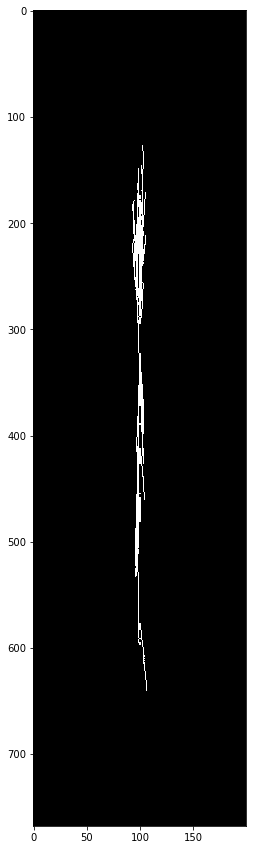

In [53]:
plt.figure(figsize=(15,15))
plt.imshow(mip_sk/mip_sk.max(), cmap='gray')
plt.show()

# Produce 2D maximal intensity projection images from swc

In [88]:
# don't run again
#for i, nid in enumerate(neurons_use_filter.neuron_id):
    if i % 100 == 0:
        print(i)
    swc_path = '../data/swc_std/%d.swc' % nid
    swc = loadswc(swc_path)
    imgshape = (768, 768, 192)
    swc = normalize_swc(swc, canvas_shape=imgshape, shrink=2)
    skimg_3d_render = draw_sk_img(imgshape, swc, dims=3)
    mip_sk_3d = np.max(skimg_3d_render, axis=2)
    plt.imsave(fname = '../data/png_mip_768_200/%d.png' % nid, arr=mip_sk_3d/mip_sk_3d.max(), cmap='gray')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800


In [59]:
for i, nid in enumerate(neurons_use_filter.neuron_id):
    if i % 100 == 0:
        print(i)
    swc_path = '../data/swc_std/%d.swc' % nid
    swc = loadswc(swc_path)
    imgshape = (256, 256, 64)
    swc = normalize_swc(swc, canvas_shape=imgshape, shrink=6)
    skimg_3d_render = draw_sk_img(imgshape, swc, dims=3)
    mip_sk_3d = np.max(skimg_3d_render, axis=2)
    plt.imsave(fname = '../data/png_mip_256/%d.png' % nid, arr=mip_sk_3d/mip_sk_3d.max(), cmap='gray')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800


In [70]:
for i, nid in enumerate(neurons_use_filter.neuron_id):
    if i % 100 == 0:
        print(i)
    swc_path = '../data/swc_std/%d.swc' % nid
    swc = loadswc(swc_path)
    imgshape = (256, 256, 64)
    swc = normalize_fit_swc(swc, canvas_shape=imgshape)
    skimg_3d_render = draw_sk_img(imgshape, swc, dims=3)
    mip_sk_3d = np.max(skimg_3d_render, axis=2)
    plt.imsave(fname = '../data/png_mip_256_fit_3d/%d.png' % nid, arr=mip_sk_3d/mip_sk_3d.max(), cmap='gray')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100


../src/preprocessing.py:25: RuntimeWarning: divide by zero encountered in true_divide
  swc[:,2:5] *= (np.min(canvas_shape / (max_arr - min_arr)) - 0.1)


7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800


In [189]:
for i, nid in enumerate(neurons_use_filter.neuron_id):
    if i % 100 == 0:
        print(i)
    swc_path = '../data/swc_std/%d.swc' % nid
    swc = loadswc(swc_path)
    imgshape = (256, 256, 64)
    swc = normalize_fit_swc(swc, canvas_shape=imgshape, dims=2)
    skimg_2d_render = draw_sk_img(imgshape, swc, dims=2)
    #mip_sk_3d = np.max(skimg_3d_render, axis=2)
    imageio.imwrite(uri = '../data/png_mip_256_fit_2d/%d.png' % nid, im=skimg_2d_render.astype('uint8') * 255)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100


../src/preprocessing.py:25: RuntimeWarning: divide by zero encountered in true_divide
  ratio = np.min(canvas_shape / (max_arr - min_arr)) * 0.9


7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800


In [200]:
t0 = time.time()
image_list = []
for i, nid in enumerate(neurons_use_filter.neuron_id):
    img_path = '../data/png_mip_256_fit_2d/%d.png' % nid
    img = imageio.imread(img_path)
    image_list.append(img)
t1 = time.time()
print(t1-t0)

6.606354236602783


In [211]:
images = np.concatenate(image_list)
images.shape

(4316672, 256)

In [212]:
images = images.reshape(len(neurons_use_filter.neuron_id),256,256)
images.shape

(16862, 256, 256)

In [213]:
images[0]

array([[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]], dtype=uint8)

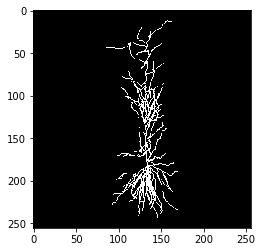

In [214]:
plt.imshow(images[0], cmap=plt.cm.gray)
plt.show()

In [119]:
images_np = np.concatenate(images)
images_np.shape

(1280, 256, 4)